This project uses the famous MNIST database to identify number images from 0 to 9. These grayscale images have a size of 28 x 28 pixels. The objective is to surpass the 99% in the validation accuracy.

In [1]:
# Importing the necessary libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
# Loading the data into the training and test sets 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Converting the data points into float32 in order to process it correctly and normalizing them
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# Reshaping the data to the original image sizes (28 * 28)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [5]:
# Creating the model
model = Sequential()

model.add(Conv2D(filters = 4, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1, 1)))

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1, 1)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1, 1)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [6]:
# Creating a Model Checkpoint to save the model when its validation accuracy is at its highest
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [7]:
# Compiling the model
model.compile(optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
              , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
        

In [8]:
# Fitting the model
history = model.fit(x_train, y_train,batch_size=500,epochs= 10, verbose=1, validation_data=(x_test, y_test), 
                    callbacks=[mc])

Epoch 1/10
120/120 [==============================] - 732s 6s/step - loss: 1.5861 - accuracy: 0.5751 - val_loss: 0.0664 - val_accuracy: 0.9774

Epoch 00001: val_accuracy improved from -inf to 0.97740, saving model to best_model.h5
Epoch 2/10
120/120 [==============================] - 667s 6s/step - loss: 0.0989 - accuracy: 0.9692 - val_loss: 0.0359 - val_accuracy: 0.9883

Epoch 00002: val_accuracy improved from 0.97740 to 0.98830, saving model to best_model.h5
Epoch 3/10
120/120 [==============================] - 694s 6s/step - loss: 0.0455 - accuracy: 0.9860 - val_loss: 0.0280 - val_accuracy: 0.9901

Epoch 00003: val_accuracy improved from 0.98830 to 0.99010, saving model to best_model.h5
Epoch 4/10
120/120 [==============================] - 724s 6s/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0316 - val_accuracy: 0.9895

Epoch 00004: val_accuracy did not improve from 0.99010
Epoch 5/10
120/120 [==============================] - 671s 6s/step - loss: 0.0220 - accuracy: 0.9932 -

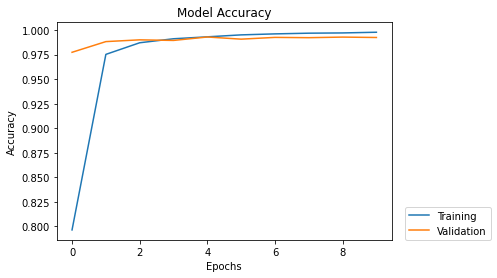

In [9]:
# Plotting the training and validation accuracy of the model to compare them
plt.plot(history.history['accuracy'], label = 'Training')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=(1.04,0))
plt.show()

The best model considering the validation accuracy (val_accuracy) was 99.30% on the 5th epoch, which is a very high accuracy and could be considered a top-performing model (+99% accuracy). We can see after comparing both training and validation that there was neither overfitting nor underfitting.